# Evaluating QR simulations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

datapath = Path.home() / "Box/NASA_Figures/data/validation"

plt.style.use("ggplot")

In [44]:
model_name = "qr_exp2"
sims = pd.read_csv(datapath / f"predictions/{model_name}.csv")
sims

,lower_50,lower_80,lower_95,upper_50,upper_80,upper_95,mean,actual,name,variable,t,noise
0,0.343408,0.343408,0.343408,0.343408,0.343408,0.343408,0.343408,170.224609,val_train,theta,400.00,det
1,0.355629,0.355615,0.355558,0.355714,0.355721,0.355821,0.355657,170.258943,val_train,theta,400.01,det
2,0.368465,0.368402,0.368309,0.368615,0.368699,0.368835,0.368523,170.294188,val_train,theta,400.02,det
3,0.381824,0.381755,0.381593,0.382089,0.382261,0.382426,0.381951,170.330353,val_train,theta,400.03,det
4,0.395725,0.395611,0.395281,0.396094,0.396355,0.396540,0.395887,170.367448,val_train,theta,400.04,det
...,...,...,...,...,...,...,...,...,...,...,...,...
200003,-0.177938,-0.241329,-0.379159,-0.044180,0.082405,0.276174,-0.096813,-1.043615,train,x_d,399.96,det
200004,-0.200592,-0.257010,-0.392664,-0.065888,0.062936,0.256641,-0.117958,-1.062525,train,x_d,399.97,det
200005,-0.218672,-0.272864,-0.404936,-0.085353,0.044451,0.229387,-0.137574,-1.078591,train,x_d,399.98,det
200006,-0.224478,-0.284878,-0.414706,-0.102833,0.026271,0.209490,-0.153554,-1.091739,train,x_d,399.99,det


In [45]:
# Read in parameters
import json

with open(datapath / f"parameters/{model_name}.json", "r") as f:
    params = json.load(f)
if "dt" not in params:
    params["dt"] = params["model_params"]["dt"]

## Plot

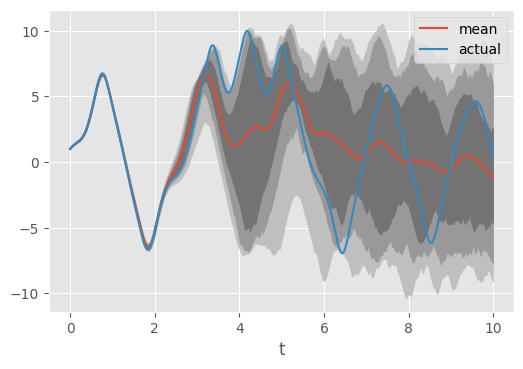

In [49]:
var = "theta_d"
name = "train"
nrows = 1000

# Filtered data
tmp = sims[(sims.name == name) & (sims.variable == var)].set_index("t").iloc[:nrows]

# Plot
fig, ax = plt.subplots(dpi=100)
for i, lev in enumerate(reversed(sorted(params["levels"]))):
    ax.fill_between(
        tmp.index,
        y1=tmp[f"lower_{lev}"],
        y2=tmp[f"upper_{lev}"],
        color=str(0.9 - 0.15 * (i + 1)),
        label="",
    )
tmp[["mean", "actual"]].plot(ax=ax)

plt.show()

In [39]:
import pickle

model_name = "qr_exp2"
with open(datapath/ f"model_objects/{model_name}.pkl", "rb"
        ) as inp:
    model = pickle.load(inp)

model

<AxesSubplot:>

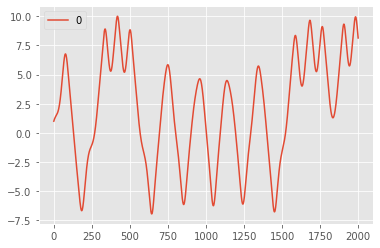

In [40]:
pd.DataFrame(model.x[:2000, [2]]).plot()

<AxesSubplot:>

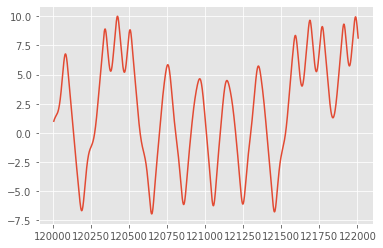

In [41]:
sims.loc[(sims.name == name) & (sims.variable == "theta_d"), "actual"].iloc[:2000].plot()